In [29]:
%matplotlib inline
import seaborn as sns
import pymc3 as pm

import matplotlib.pyplot as plt
import numpy as np

import theano



In [2]:
size = 100
true_intercept = 1
true_slope = 2

x = np.linspace(0, 1, size)
# y = a + b*x
true_regression_line = true_intercept + true_slope * x
# add noise
y = true_regression_line + np.random.normal(scale=.5, size=size)

# Add outliers
x_out = np.append(x, [.1, .15, .2])
y_out = np.append(y, [8, 6, 9])

data = dict(x=x_out, y=y_out)

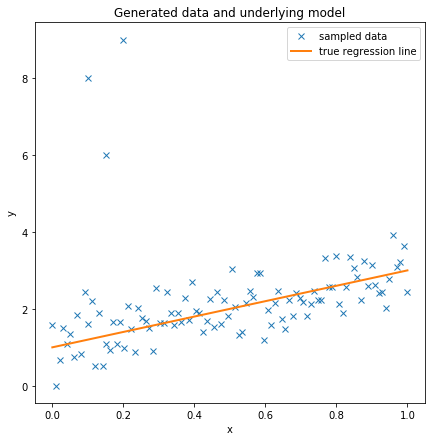

In [3]:
fig = plt.figure(figsize=(7, 7))
ax = fig.add_subplot(111, xlabel='x', ylabel='y', title='Generated data and underlying model')
ax.plot(x_out, y_out, 'x', label='sampled data')
ax.plot(x, true_regression_line, label='true regression line', lw=2.)
plt.legend(loc=0);

In [4]:
with pm.Model() as model:
    pm.glm.GLM.from_formula('y ~ x', data)
    trace = pm.sample(2000, njobs=2)

Auto-assigning NUTS sampler...
Initializing NUTS using ADVI...
Average Loss = 178.74:   6%|▌         | 11344/200000 [00:01<00:31, 6078.15it/s]
Convergence archived at 11900
Interrupted at 11,900 [5%]: Average Loss = 265.04
100%|██████████| 2500/2500 [00:08<00:00, 282.44it/s]


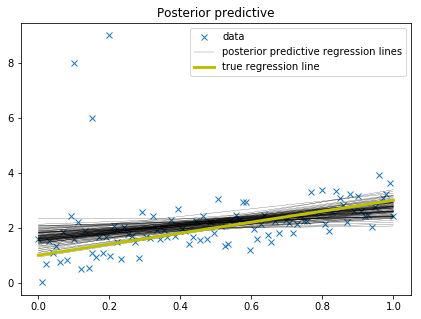

In [5]:
plt.figure(figsize=(7, 5))
plt.plot(x_out, y_out, 'x', label='data')
pm.plot_posterior_predictive_glm(trace, samples=100,
                                 label='posterior predictive regression lines')
plt.plot(x, true_regression_line,
         label='true regression line', lw=3., c='y')

plt.legend(loc=0);

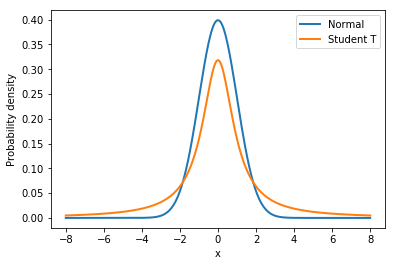

In [6]:

normal_dist = pm.Normal.dist(mu=0, sd=1)
t_dist = pm.StudentT.dist(mu=0, lam=1, nu=1)
x_eval = np.linspace(-8, 8, 300)
plt.plot(x_eval, theano.tensor.exp(normal_dist.logp(x_eval)).eval(), label='Normal', lw=2.)
plt.plot(x_eval, theano.tensor.exp(t_dist.logp(x_eval)).eval(), label='Student T', lw=2.)
plt.xlabel('x')
plt.ylabel('Probability density')
plt.legend();



Auto-assigning NUTS sampler...
Initializing NUTS using ADVI...
Average Loss = 130.79:   6%|▌         | 11914/200000 [00:02<00:33, 5572.68it/s]
Convergence archived at 12100
Interrupted at 12,100 [6%]: Average Loss = 177.47
100%|██████████| 2500/2500 [00:10<00:00, 229.32it/s]


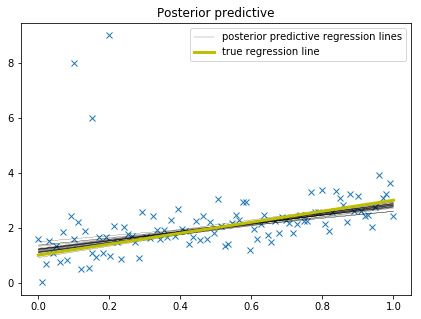

In [7]:
with pm.Model() as model_robust:
    family = pm.glm.families.StudentT()
    pm.glm.GLM.from_formula('y ~ x', data, family=family)
    trace_robust = pm.sample(2000, njobs=2)

plt.figure(figsize=(7, 5))
plt.plot(x_out, y_out, 'x')
pm.plot_posterior_predictive_glm(trace_robust,
                                 label='posterior predictive regression lines')
plt.plot(x, true_regression_line,
         label='true regression line', lw=3., c='y')
plt.legend();

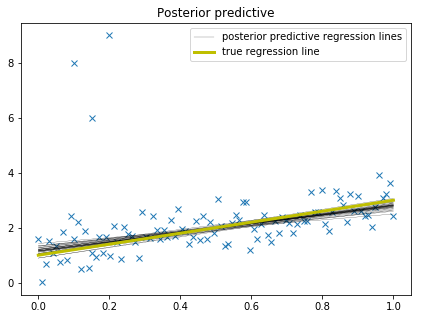

In [20]:

plt.figure(figsize=(7, 5))



plt.plot(x_out, y_out, 'x')
pm.plot_posterior_predictive_glm(trace_robust,
                                 label='posterior predictive regression lines')
plt.plot(x, true_regression_line,
         label='true regression line', lw=3., c='y')
plt.legend();

ValueError: x and y must have same first dimension, but have shapes (100,) and (1,)

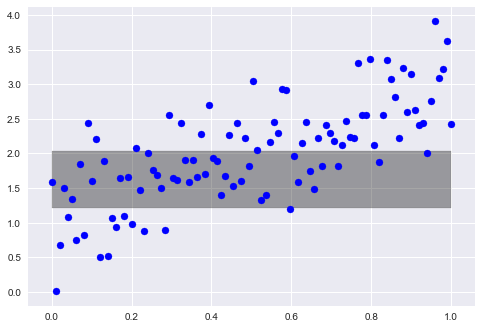

In [33]:
fig, ax = plt.subplots()
ax.scatter(x, y, c = 'blue', zorder=10, label=None);
low, high = np.percentile(trace_robust['x'], [2.5, 97.5], axis=0)
ax.fill_between(x, low, high, color='k', alpha=0.35, zorder=5, label='95% posterior credible interval');

ax.plot(x, trace_robust['x'].mean(axis=0), c='k', zorder=6, label='Posterior expected value');

In [26]:
df250

NameError: name 'df250' is not defined